UPLOADING ALL EMBEDDINGS AND DATA FILES

In [5]:
from google.colab import drive
import numpy as np
import json

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/share/'

try:

    w2v_fasttext_glove_combined = np.load(drive_path + 'w2v_fasttext_glove_combined_embeddings.npy')
    hybrid_embeddings = np.load(drive_path + 'hybrid_embeddings.npy')
    glove_w2v_enhanced = np.load(drive_path + 'glove_w2v_enhanced_embeddings.npy')
    final_w2v_embeddings = np.load(drive_path + 'final_w2v_embeddings.npy')

    with open(drive_path + 'final(dupless).json', 'r') as f:
        augmented_data = json.load(f)

    print("All files loaded successfully!")

    print("\nLoaded arrays shapes:")
    print(f"w2v_fasttext_glove_combined: {w2v_fasttext_glove_combined.shape}")
    print(f"hybrid_embeddings: {hybrid_embeddings.shape}")
    print(f"glove_w2v_enhanced: {glove_w2v_enhanced.shape}")
    print(f"final_w2v_embeddings: {final_w2v_embeddings.shape}")

    print("\nAugmented data type:", type(augmented_data))

except FileNotFoundError as e:
    print(f"File not found error: {e}")
    print("Please verify:")
    print(f"1. The folder name is exactly 'Mt2024121_PriyanshRai_Virtual_Demo'")
    print(f"2. All files exist in this folder")
    print("Current folder contents:")
    !ls "{drive_path}"
except Exception as e:
    print(f"Error loading files: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All files loaded successfully!

Loaded arrays shapes:
w2v_fasttext_glove_combined: (48945, 100)
hybrid_embeddings: (48945, 100)
glove_w2v_enhanced: (48945, 100)
final_w2v_embeddings: (48945, 100)

Augmented data type: <class 'list'>


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA

 This script analyzes word embeddings and augmented NLP dataset:
 - `analyze_embeddings` examines the shape, value distribution, and vector norms of embedding matrices.
 - `analyze_json_data` evaluates sentence lengths, sentiment distribution, word frequencies, and visualizes key statistics.



W2V+FastText+GloVe Embedding Analysis:
Shape: (48945, 100)


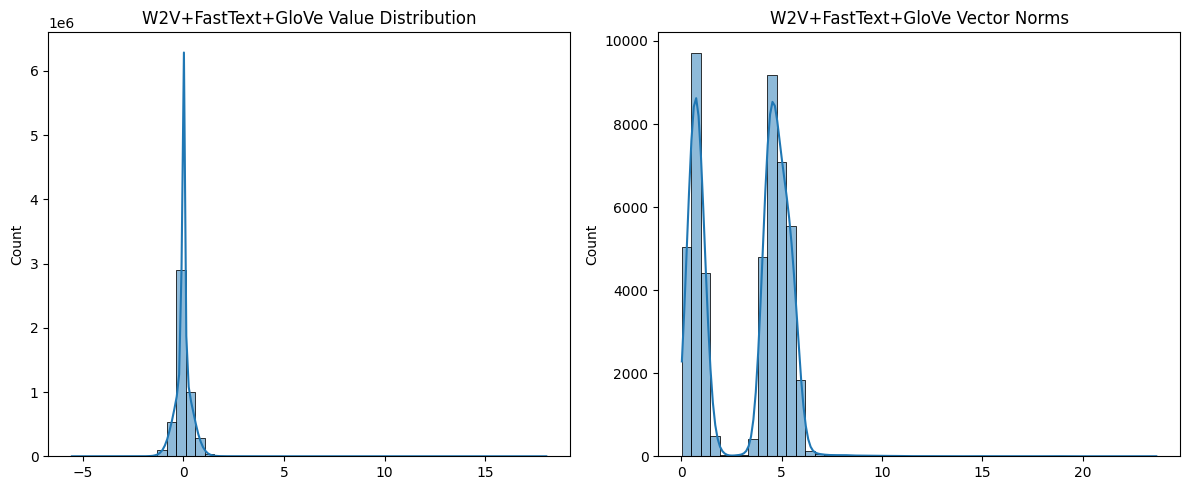

Min: -5.5483
Max: 18.0376
Mean: 0.0019
Std: 0.3828

Hybrid Embedding Analysis:
Shape: (48945, 100)


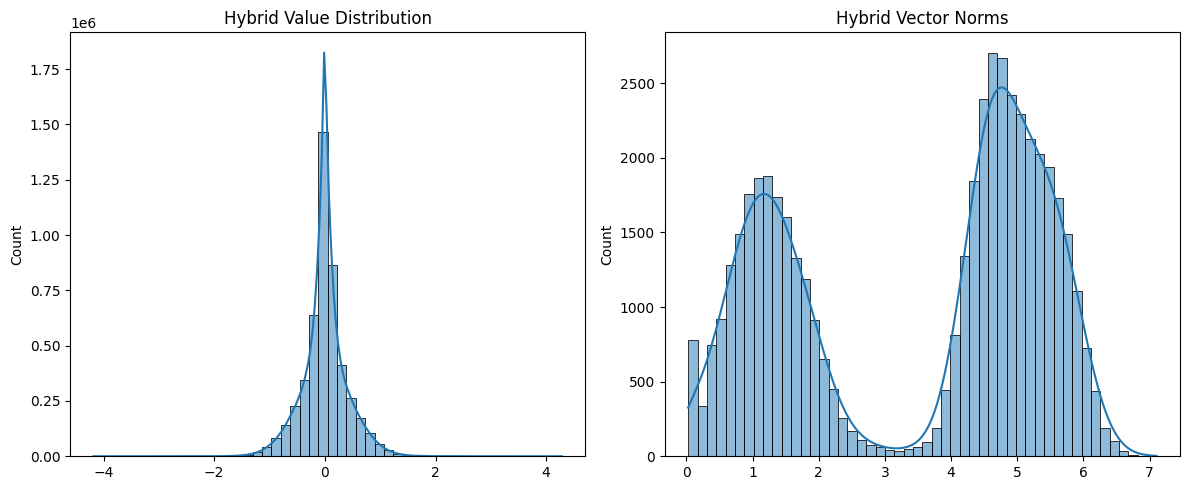

Min: -4.1829
Max: 4.2842
Mean: -0.0010
Std: 0.3985

GloVe+W2V Enhanced Embedding Analysis:
Shape: (48945, 100)


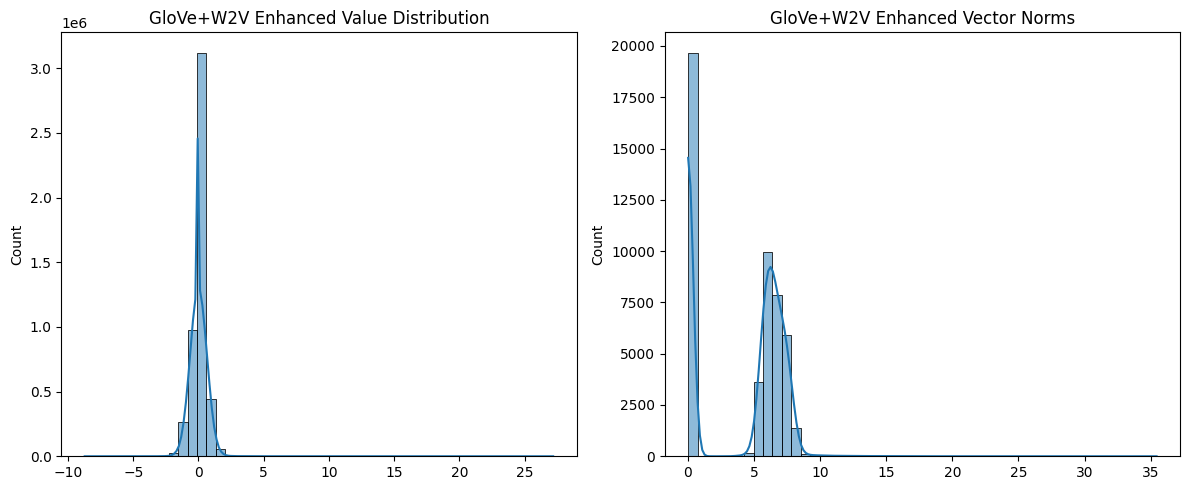

Min: -8.7207
Max: 27.1894
Mean: 0.0066
Std: 0.5165

Final W2V Embedding Analysis:
Shape: (48945, 100)


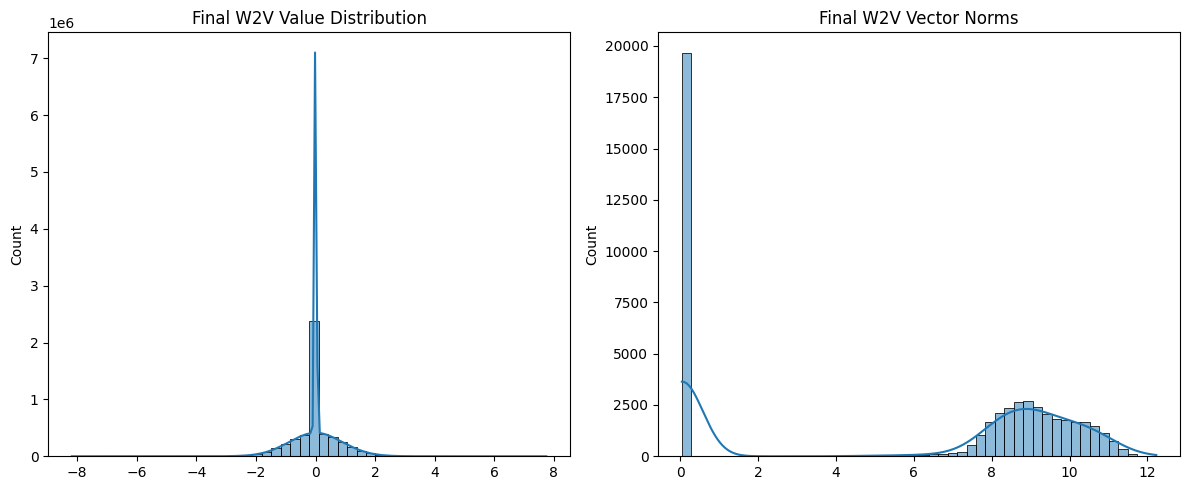

Min: -8.1815
Max: 7.7494
Mean: 0.0073
Std: 0.7159

Augmented JSON Data Analysis:
Shape: (51418, 4)
Sentiment counts:
 sentiment
 0    21112
 1    18172
-1    12134
Name: count, dtype: int64


<ipython-input-3-4475408c19c0>:58: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4475408c19c0>:58: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


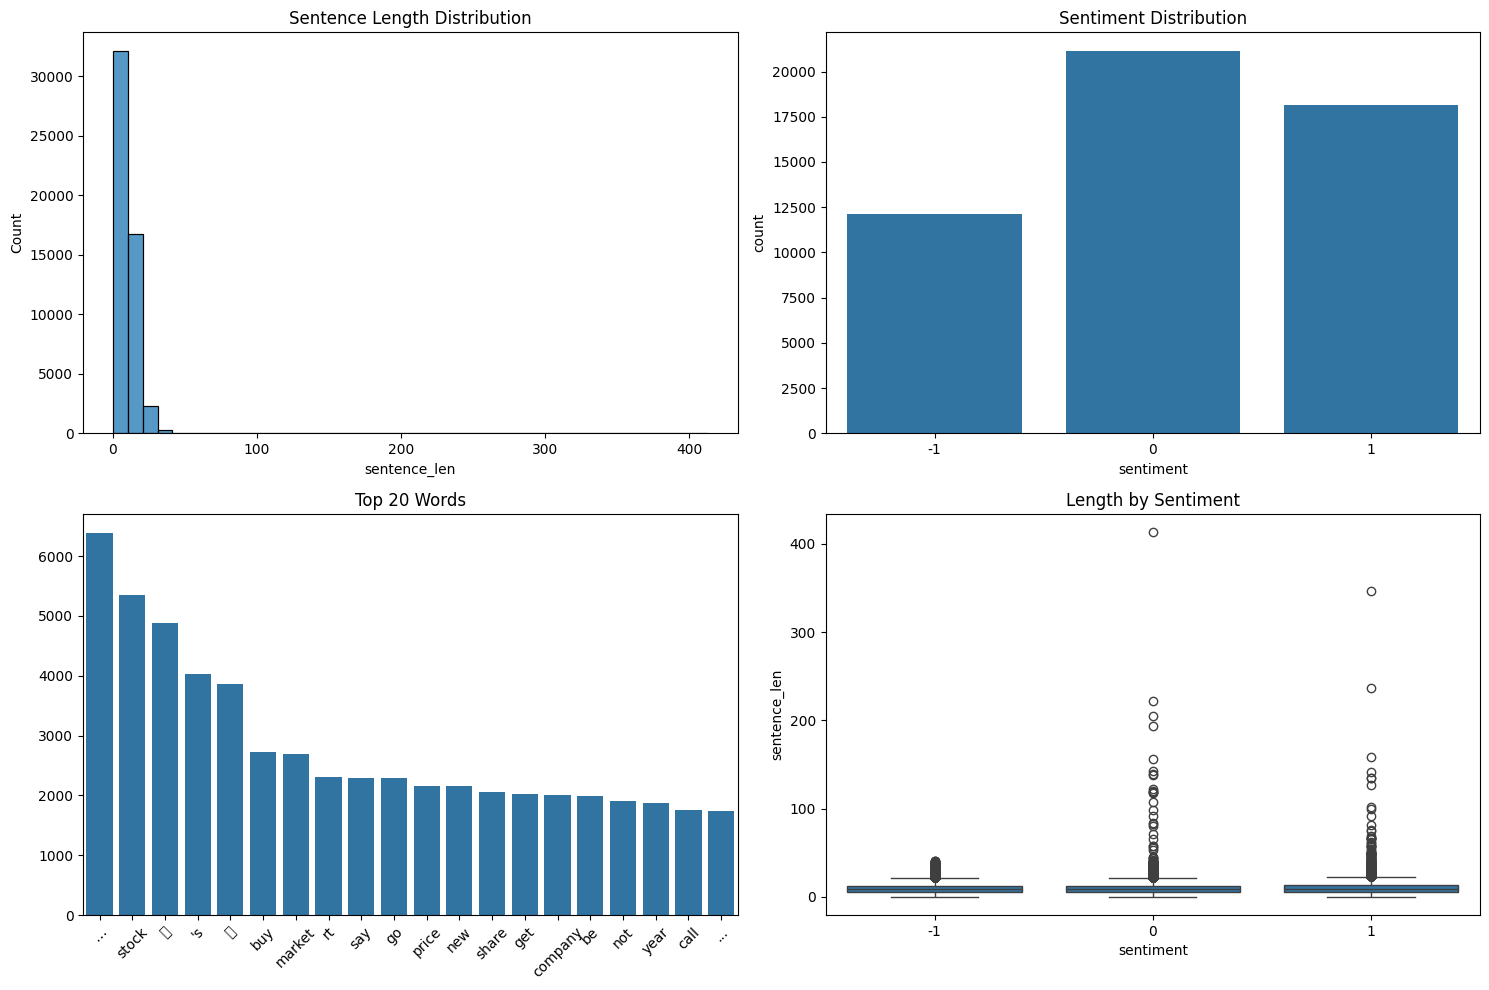

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_embeddings(embeddings, name):
    print(f"\n{name} Embedding Analysis:")
    print("Shape:", embeddings.shape)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(embeddings.flatten(), bins=50, kde=True)
    plt.title(f"{name} Value Distribution")

    plt.subplot(1, 2, 2)
    norms = np.linalg.norm(embeddings, axis=1)
    sns.histplot(norms, bins=50, kde=True)
    plt.title(f"{name} Vector Norms")
    plt.tight_layout()
    plt.show()

    print(f"Min: {np.min(embeddings):.4f}")
    print(f"Max: {np.max(embeddings):.4f}")
    print(f"Mean: {np.mean(embeddings):.4f}")
    print(f"Std: {np.std(embeddings):.4f}")

def analyze_json_data(data):
    data_df = pd.DataFrame(data)
    data_df['sentence_str'] = data_df['sentence'].apply(lambda x: ' '.join(x))
    data_df['sentence_len'] = data_df['sentence'].apply(len)

    print("\nAugmented JSON Data Analysis:")
    print("Shape:", data_df.shape)
    print("Sentiment counts:\n", data_df['sentiment'].value_counts())

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data_df['sentence_len'], bins=40)
    plt.title("Sentence Length Distribution")

    plt.subplot(2, 2, 2)
    sns.countplot(x='sentiment', data=data_df)
    plt.title("Sentiment Distribution")

    plt.subplot(2, 2, 3)
    all_words = [word for sent in data_df['sentence'] for word in sent]
    word_freq = Counter(all_words).most_common(20)
    sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
    plt.xticks(rotation=45)
    plt.title("Top 20 Words")

    plt.subplot(2, 2, 4)
    sns.boxplot(x='sentiment', y='sentence_len', data=data_df)
    plt.title("Length by Sentiment")

    plt.tight_layout()
    plt.show()

analyze_embeddings(w2v_fasttext_glove_combined, "W2V+FastText+GloVe")
analyze_embeddings(hybrid_embeddings, "Hybrid")
analyze_embeddings(glove_w2v_enhanced, "GloVe+W2V Enhanced")
analyze_embeddings(final_w2v_embeddings, "Final W2V")
analyze_json_data(augmented_data)

This script provides a quick statistical and dimensionality reduction analysis of word embeddings:  
- `fast_analyze` computes mean and standard deviation distributions, and visualizes embeddings using PCA and t-SNE.  
- Additionally, it plots sentence length distribution from the augmented dataset if available.



W2V+FastText+GloVe Analysis:
Shape: (48945, 100)


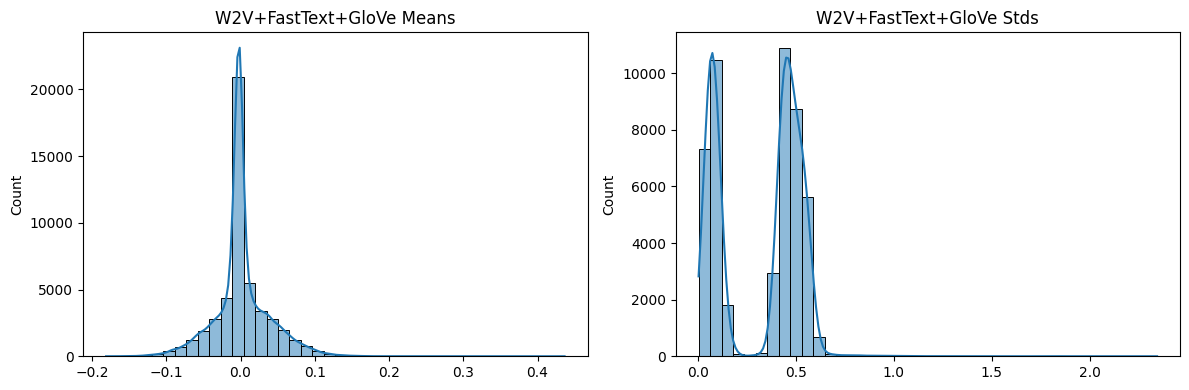

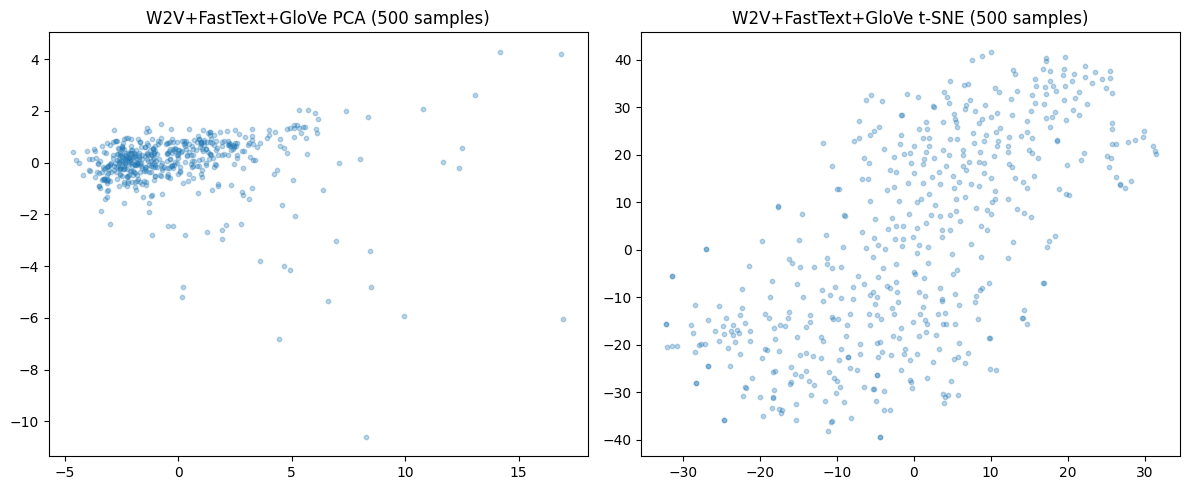


Hybrid Analysis:
Shape: (48945, 100)


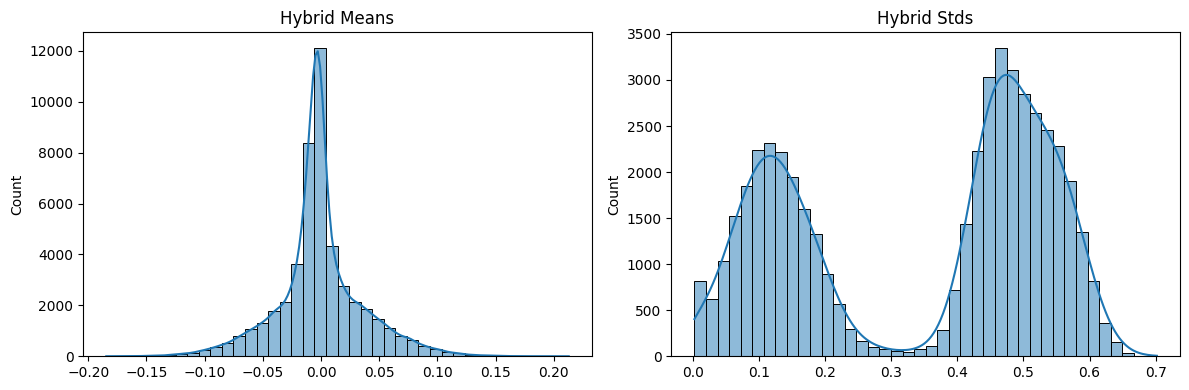

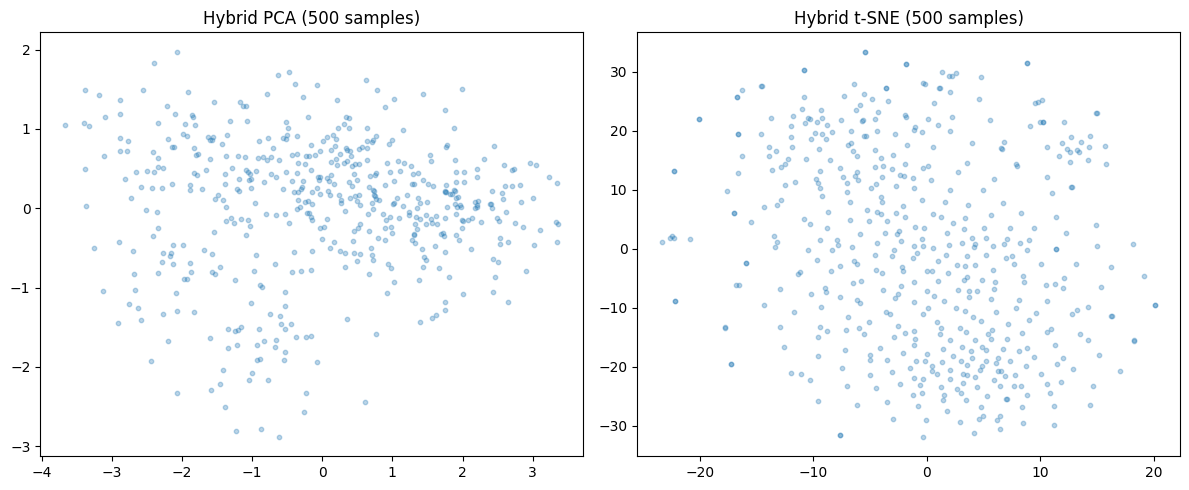


GloVe+W2V Analysis:
Shape: (48945, 100)


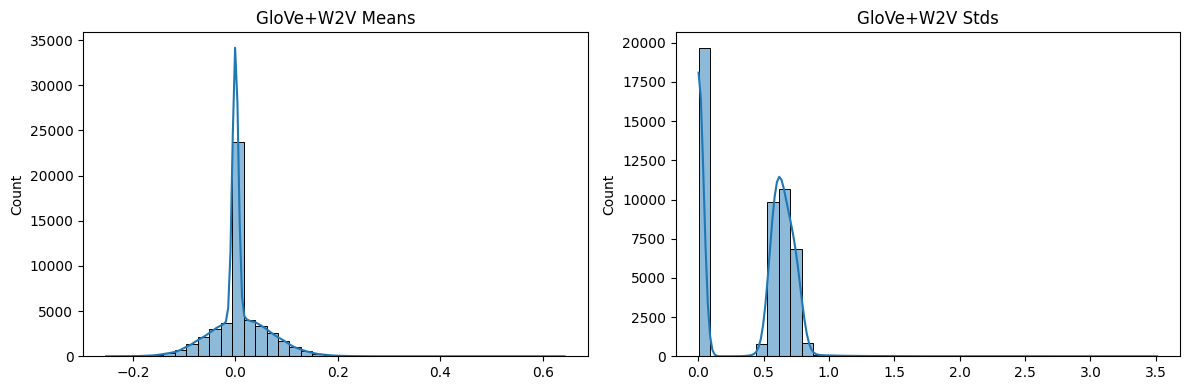

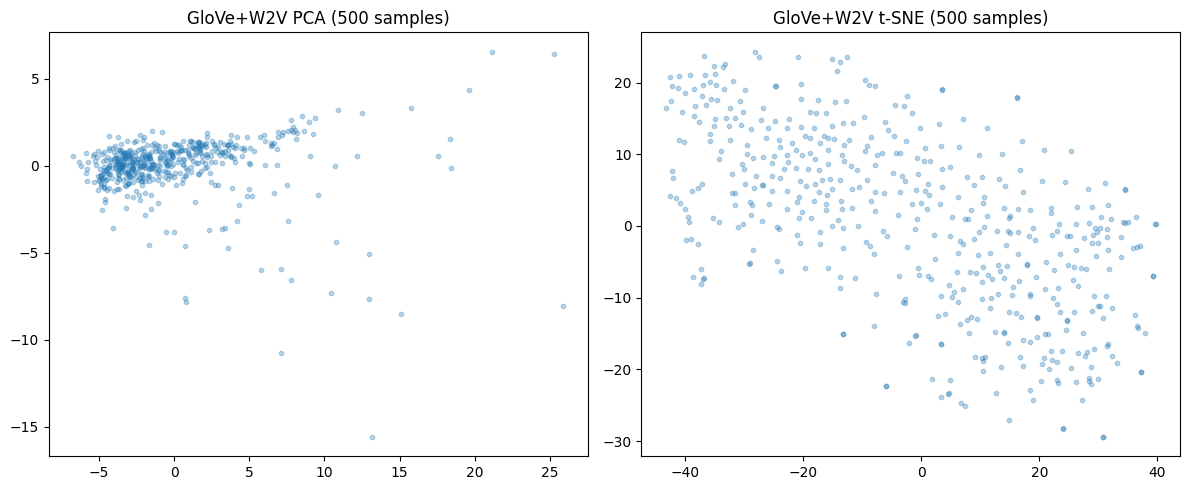


Final W2V Analysis:
Shape: (48945, 100)


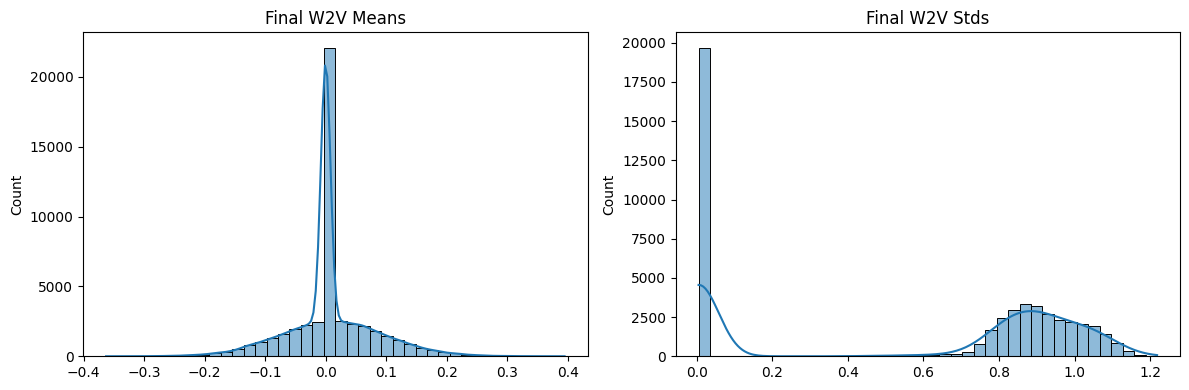

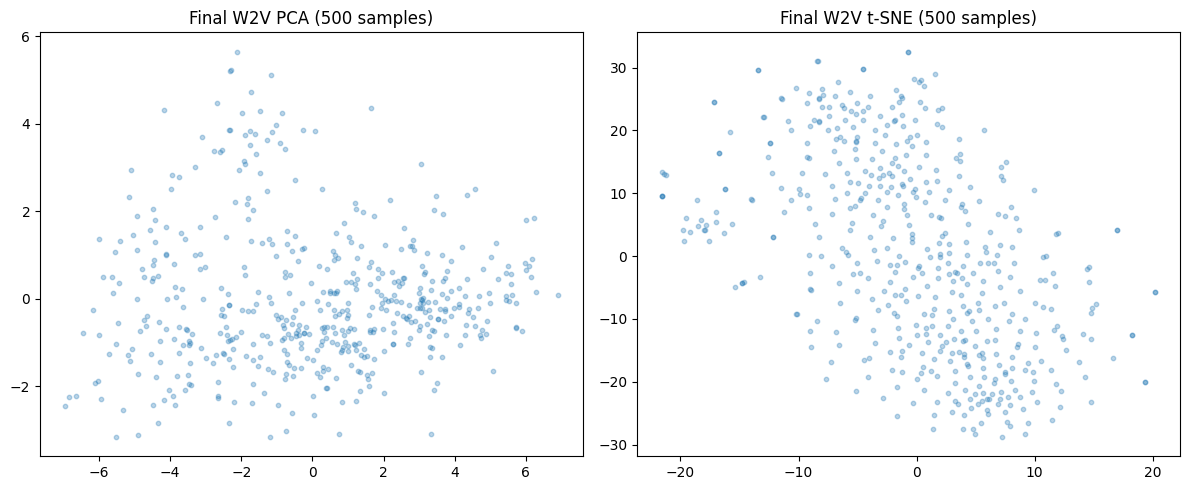

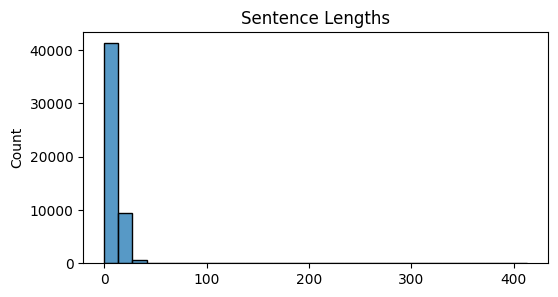

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def fast_analyze(embeddings, name):
    print(f"\n{name} Analysis:")
    print("Shape:", embeddings.shape)

    means = np.mean(embeddings, axis=1)
    stds = np.std(embeddings, axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(means, kde=True, bins=40, ax=ax1)
    sns.histplot(stds, kde=True, bins=40, ax=ax2)
    ax1.set_title(f"{name} Means")
    ax2.set_title(f"{name} Stds")
    plt.tight_layout()
    plt.show()

    sample = embeddings[:500]

    pca = PCA(n_components=2, svd_solver='randomized')
    pca_result = pca.fit_transform(sample)

    tsne = TSNE(n_components=2, random_state=42, perplexity=15, angle=0.5)
    tsne_result = tsne.fit_transform(sample)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, s=10)
    ax2.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.3, s=10)
    ax1.set_title(f"{name} PCA (500 samples)")
    ax2.set_title(f"{name} t-SNE (500 samples)")
    plt.tight_layout()
    plt.show()

fast_analyze(w2v_fasttext_glove_combined, "W2V+FastText+GloVe")
fast_analyze(hybrid_embeddings, "Hybrid")
fast_analyze(glove_w2v_enhanced, "GloVe+W2V")
fast_analyze(final_w2v_embeddings, "Final W2V")

if isinstance(augmented_data, list):
    lengths = np.array([len(x['sentence']) for x in augmented_data])
    plt.figure(figsize=(6, 3))
    sns.histplot(lengths, bins=30)
    plt.title("Sentence Lengths")
    plt.show()

Quality analysis for embeddings

This script evaluates the internal consistency of different word embeddings using cosine similarity:
- `analyze_embeddings` computes pairwise cosine similarities for a subset of embedding vectors and plots the similarity distribution.
- The results are aggregated to compare mean, median, and standard deviation of similarity scores across multiple embedding types.


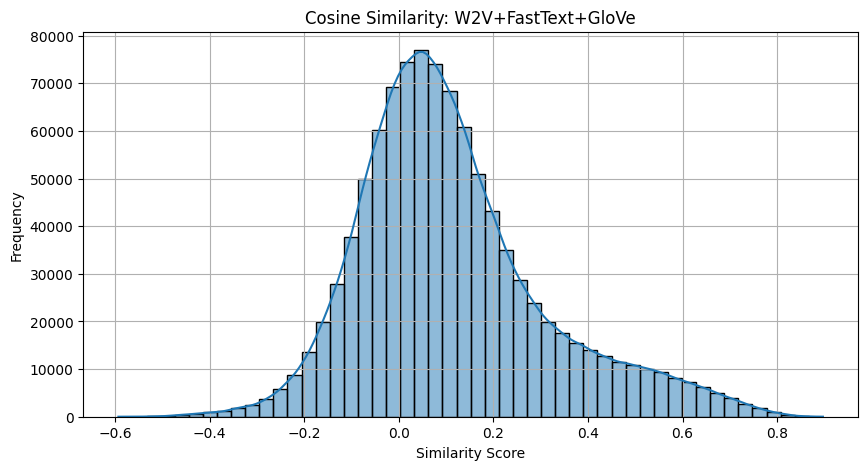

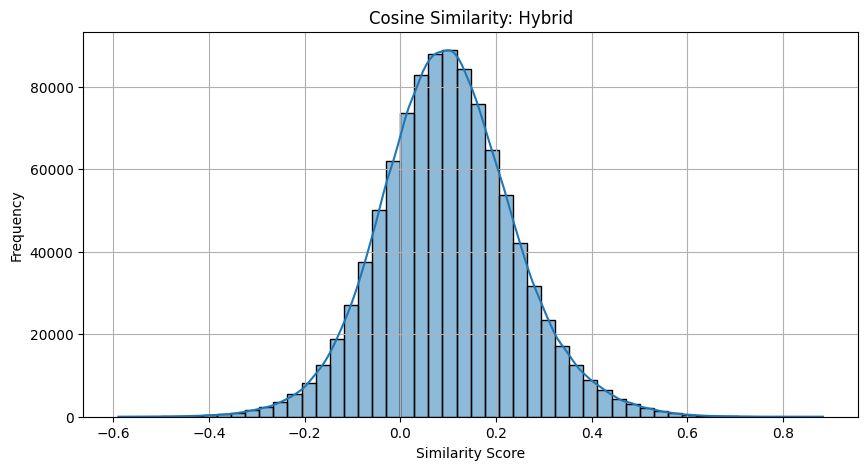

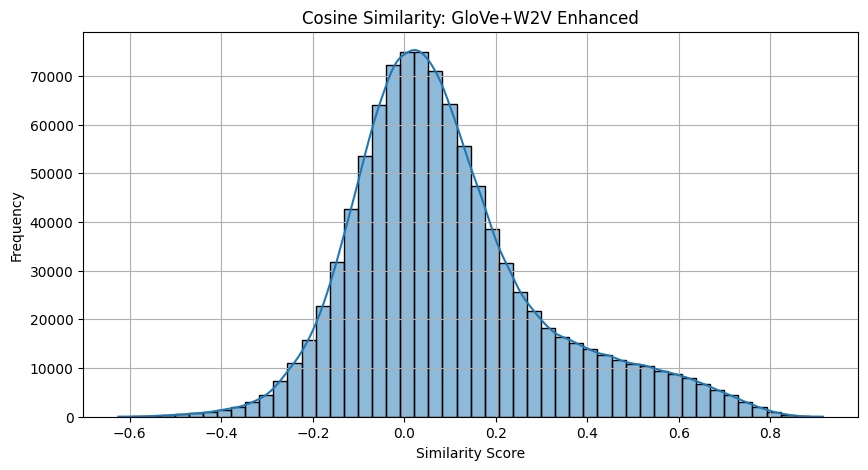

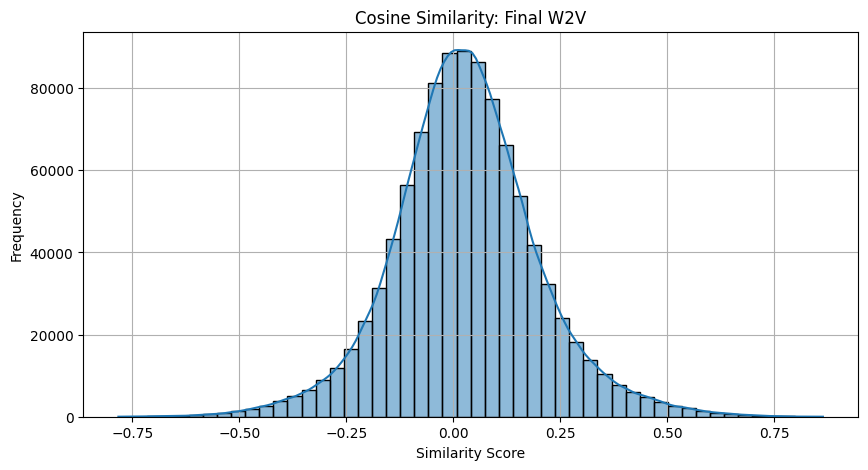

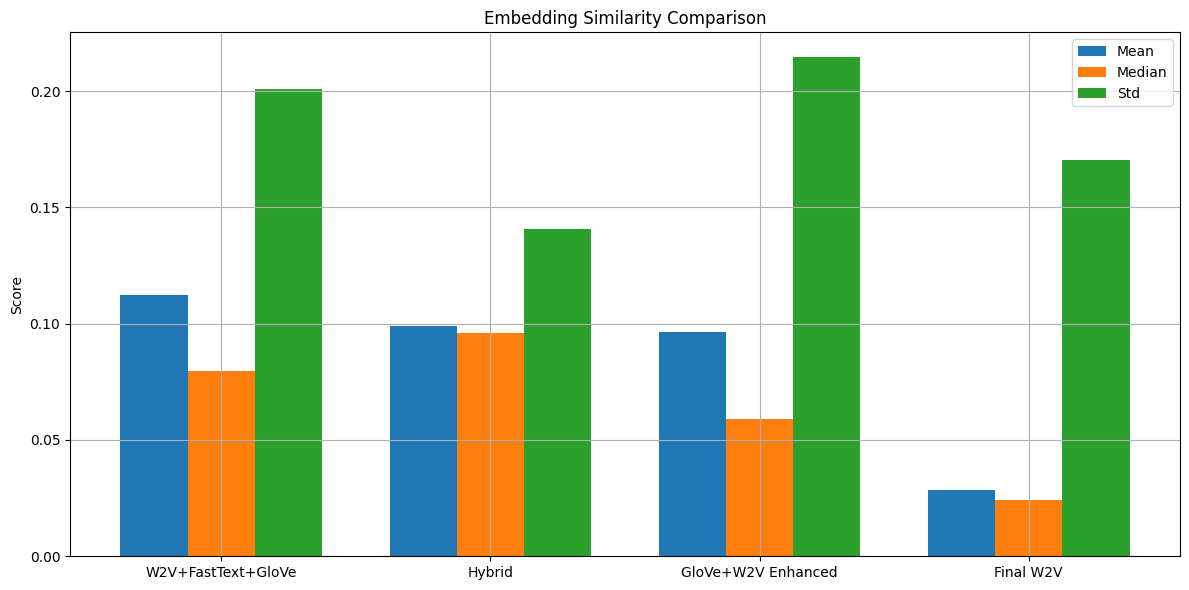

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_embeddings(embeddings, name):
    if len(embeddings) == 0:
        print(f"Skipping {name} - empty embeddings")
        return None

    sample_size = min(1000, len(embeddings))
    subset = embeddings[:sample_size]

    similarity_matrix = cosine_similarity(subset)
    np.fill_diagonal(similarity_matrix, np.nan)
    similarities = similarity_matrix[~np.isnan(similarity_matrix)].flatten()

    plt.figure(figsize=(10, 5))
    sns.histplot(similarities, bins=50, kde=True)
    plt.title(f"Cosine Similarity: {name}")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    return {
        'name': name,
        'mean': np.mean(similarities),
        'median': np.median(similarities),
        'std': np.std(similarities)
    }

embeddings_data = [
    (w2v_fasttext_glove_combined, "W2V+FastText+GloVe"),
    (hybrid_embeddings, "Hybrid"),
    (glove_w2v_enhanced, "GloVe+W2V Enhanced"),
    (final_w2v_embeddings, "Final W2V")
]

results = []
for emb, name in embeddings_data:
    res = analyze_embeddings(emb, name)
    if res:
        results.append(res)

if results:
    metrics = ['mean', 'median', 'std']
    x = np.arange(len(results))
    width = 0.25

    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width - width, [r[metric] for r in results],
                width, label=metric.capitalize())

    plt.xticks(x, [r['name'] for r in results])
    plt.title("Embedding Similarity Comparison")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

ESTABLISHING 1:1 CORRESPONDENCE BETWEEN  THE DATA AND THE EMBEDDINGS

This script generates sentence-level embeddings from various word embedding matrices:
- `get_sentence_embedding` computes the mean vector for each sentence based on available word embeddings.
- It loads a vocabulary mapping from a JSON file and uses it to match words with their corresponding vectors.
- Sentence embeddings (`X`) and sentiment labels (`y`) are prepared for each embedding type and stored in `results`.


In [7]:
import json
import numpy as np
from tqdm import tqdm

def get_sentence_embedding(sentence, word_to_vec, dim):
    vecs = [word_to_vec[word] for word in sentence if word in word_to_vec]
    return np.mean(vecs, axis=0) if vecs else np.zeros(dim)

try:
    with open("vocabulary.json", "r") as f:
        vocab_data = json.load(f)
        word2idx = vocab_data["word2idx"]
except json.JSONDecodeError as e:
    print(f"Error loading JSON: {e}")
    # Optionally log the issue or attempt to recover part of the data

embeddings = {
    'w2v_fasttext_glove_combined': w2v_fasttext_glove_combined,
    'hybrid': hybrid_embeddings,
    'glove_w2v_enhanced': glove_w2v_enhanced,
    'final_w2v': final_w2v_embeddings
}

results = {}

for name, emb in embeddings.items():
    word_to_vec = {word: emb[idx] for word, idx in word2idx.items() if idx < emb.shape[0]}
    dim = emb.shape[1]

    X = np.vstack([
        get_sentence_embedding(sent['sentence'], word_to_vec, dim)
        for sent in tqdm(augmented_data, desc=f"Processing {name}")
    ])
    y = np.array([sent['sentiment'] for sent in augmented_data])

    results[name] = (X, y)


Processing final_w2v: 100%|██████████| 51418/51418 [00:01<00:00, 34212.92it/s]


This block verifies the correctness and alignment of generated sentence embeddings with their corresponding sentiment labels:
- Prints the first sentence, its sentiment, and part of its embedding for each embedding type.
- For each embedding type, confirms that all sentiment labels match the original data for a few fixed and random samples.
- Ensures the structure of each entry in `results` is valid and consistent across embeddings.


In [7]:
print(list(word_to_vec.items())[:5])


[('jpmorgan', array([-2.4112077 ,  1.7037572 , -0.35529578,  0.07751688, -0.74603003,
        1.0342162 , -0.01733549, -0.21918705, -0.66241044, -0.7627855 ,
        1.4497694 , -0.51591074,  0.18935531, -0.14393654,  1.7255733 ,
        1.1513835 ,  1.225253  , -0.20889652,  0.5191369 ,  0.65621525,
        0.9288482 , -0.38464808,  0.26683265,  0.07606561, -0.6594556 ,
       -0.37584206, -0.3880121 ,  0.48221207, -1.097811  , -0.4127945 ,
        0.06715636,  0.07633114,  0.85891294,  0.7240197 , -0.12755638,
       -1.4035956 , -0.96248627, -1.2225275 ,  0.9595524 , -0.53245   ,
        0.2937759 ,  0.17960773, -2.0315995 , -0.5119511 , -0.20607695,
       -0.05451557, -0.08720329,  1.1412836 ,  0.5860496 ,  0.01444851,
       -0.760955  ,  0.19382165, -1.2199233 ,  0.19688949,  1.4129415 ,
       -0.5570816 ,  0.15122272, -0.6048003 , -0.3364838 ,  0.25172   ,
        0.5026628 ,  0.50320905, -0.7485846 ,  0.4171852 ,  0.8723819 ,
       -0.08927938,  0.6285217 ,  1.0641724 , -0.1

In [8]:
for name, (X, y) in results.items():
    print(f"\nEmbedding Type: {name}")

    first_sentence = ' '.join(augmented_data[0]['sentence'])
    first_sentiment = y[0]
    first_embedding = X[0]

    print(f"Sentence: {first_sentence}")
    print(f"Sentiment: {first_sentiment}")
    print(f"Embedding Vector Shape: {first_embedding.shape}")
    print(f"Embedding Vector (first 10 dims): {first_embedding[:10]}")



Embedding Type: w2v_fasttext_glove_combined
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [ 1.9411726   0.58080691 -0.04895677 -0.15158565 -0.21194093  0.13730714
 -0.05181148  0.11869261  0.00696795 -0.44404721]

Embedding Type: hybrid
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [ 0.85128224  0.70570105 -0.28311256  0.28422666 -0.19143012 -0.17887203
  0.00333855  0.24193533  0.17839663 -0.52703702]

Embedding Type: glove_w2v_enhanced
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [ 2.6103282   0.52349919 -0.02524521 -0.29308909 -0.23035546  0.34195459
 -0.10818128  0.12961729 -0.24705899 -0.49394599]

Embedding Type: final_w2v
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 di

In [9]:
for name, value in results.items():
    print(f"\nVerifying alignment for: {name}")

    if not isinstance(value, tuple) or len(value) != 2:
        print(f"Skipping {name} — Invalid structure: {type(value)}")
        continue

    X, y = value

    # First 5 samples
    for i in range(5):
        sent_text = ' '.join(augmented_data[i]['sentence'])
        orig_sent = augmented_data[i]['sentiment']
        pred_sent = y[i]
        print(f"\nSample {i}:")
        print(f"Sentence: {sent_text}")
        print(f"Original Sentiment: {orig_sent}")
        print(f"Predicted Sentiment: {pred_sent}")
        print(f"Embedding Shape: {X[i].shape}")
        assert orig_sent == pred_sent, f"Mismatch in sentiment at index {i}"

    # Random 5 samples
    idxs = np.random.choice(len(augmented_data), 5, replace=False)
    for idx in idxs:
        assert augmented_data[idx]['sentiment'] == y[idx], f"Mismatch at random index {idx}"

    print(f"All {len(augmented_data)} samples aligned correctly for {name}")

print("\n All embeddings are aligned and correctly paired with sentiments!")



Verifying alignment for: w2v_fasttext_glove_combined

Sample 0:
Sentence: jpmorgan reel expectation beyond meat
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 1:
Sentence: nomura point booking weakness carnival royal caribbean
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 2:
Sentence: cemex cut credit suisse j.p morgan weak building outlook
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 3:
Sentence: btig research cut neutral
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 4:
Sentence: funko slide piper jaffray pt cut
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)
All 51418 samples aligned correctly for w2v_fasttext_glove_combined

Verifying alignment for: hybrid

Sample 0:
Sentence: jpmorgan reel expectation beyond meat
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 1:
Sentence: nomura point booking weakness carniva


# **MODELS IMPLEMENTATION**

LOGISTIC REGRESSSION

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import numpy as np

for name, (X, y) in results.items():
    print(f"\nLogistic Regression on: {name}")
    print("="*60)

    # Split into train+validation and test sets
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Further split train+validation into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval  # 0.25 x 0.8 = 0.2
    )

    # Initialize model
    model = LogisticRegression(max_iter=1000, random_state=42)

    print("\nCross-Validation Results:")
    # 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_trainval, y_trainval,
                              cv=cv, scoring='accuracy')
    print(f"Cross-val accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Train on training set
    model.fit(X_train, y_train)

    # Validate on validation set
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    print("\nValidation Set Performance:")
    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Validation F1 Score (weighted): {val_f1:.4f}")

    # Final evaluation on test set
    model.fit(X_trainval, y_trainval)  # Retrain on full train+validation set
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nTest Set Performance:")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Logistic Regression on: w2v_fasttext_glove_combined

Cross-Validation Results:
Cross-val accuracy: 0.5363 ± 0.0020

Validation Set Performance:
Validation Accuracy: 0.5328
Validation F1 Score (weighted): 0.5046

Test Set Performance:
Test Accuracy: 0.5392
Test F1 Score (weighted): 0.5122

Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.16      0.23      2427
           0       0.52      0.67      0.59      4223
           1       0.59      0.64      0.61      3634

    accuracy                           0.54     10284
   macro avg       0.51      0.49      0.48     10284
weighted avg       0.52      0.54      0.51     10284


Logistic Regression on: hybrid

Cross-Validation Results:
Cross-val accuracy: 0.5334 ± 0.0027

Validation Set Performance:
Validation Accuracy: 0.5329
Validation F1 Score (weighted): 0.4976

Test Set Performance:
Test Accuracy: 0.5307
Test F1 Score (weighted): 0.4960

Classification Report:
            

SVM

In [12]:
from cuml.svm import SVC as cumlSVC
from cuml.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import cudf
import numpy as np
from itertools import product

# Define numerical gamma equivalents
gamma_values = [0.01, 0.1, 1]  # 'scale' and 'auto' are not supported in cuML

for name, (X_np, y_np) in results.items():
    print(f"\n Powerful SVM (RBF) Evaluation for: {name}")
    print("=" * 70)

    # Convert to cuDF format
    X = cudf.DataFrame(X_np)
    y = cudf.Series(y_np)

    # 60% train, 20% val, 20% test
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

    # Grid search (manual loop)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': gamma_values
    }

    best_score = 0
    best_params = {}

    print("\nPerforming Manual Grid Search on GPU...")
    for C, gamma in product(param_grid['C'], param_grid['gamma']):
        model = cumlSVC(C=C, gamma=gamma, kernel='rbf')
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        acc = accuracy_score(y_val.to_numpy(), preds.to_numpy())

        if acc > best_score:
            best_score = acc
            best_params = {'C': C, 'gamma': gamma}

    print("\n Cross-Validation Results (Manual):")
    print(f"Best CV Accuracy: {best_score:.4f}")
    print(f"Optimal Parameters: {best_params}")

    # Train best model on full train + val
    print("\n Final Model Training on Combined Train+Validation Data...")
    final_model = cumlSVC(**best_params, kernel='rbf')
    final_model.fit(X_trainval, y_trainval)

    y_pred = final_model.predict(X_test)
    acc = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
    f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy(), average='weighted')

    print("\n Test Set Performance:")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(classification_report(y_test.to_numpy(), y_pred.to_numpy()))
    print("=" * 70)



 Powerful SVM (RBF) Evaluation for: w2v_fasttext_glove_combined

Performing Manual Grid Search on GPU...

 Cross-Validation Results (Manual):
Best CV Accuracy: 0.5627
Optimal Parameters: {'C': 1, 'gamma': 0.1}

 Final Model Training on Combined Train+Validation Data...

 Test Set Performance:
Test Accuracy: 0.5634
Test F1 Score: 0.5170
              precision    recall  f1-score   support

          -1       0.45      0.08      0.14      2427
           0       0.52      0.76      0.62      4222
           1       0.64      0.65      0.65      3634

    accuracy                           0.56     10283
   macro avg       0.54      0.50      0.47     10283
weighted avg       0.55      0.56      0.52     10283


 Powerful SVM (RBF) Evaluation for: hybrid

Performing Manual Grid Search on GPU...

 Cross-Validation Results (Manual):
Best CV Accuracy: 0.5592
Optimal Parameters: {'C': 1, 'gamma': 0.1}

 Final Model Training on Combined Train+Validation Data...

 Test Set Performance:
Test A

This script performs sentiment classification using an SVM with an RBF kernel for each embedding set:
- Splits data into train (60%), validation (20%), and test (20%) subsets using stratified sampling.
- Applies GridSearchCV with 3-fold cross-validation to find optimal hyperparameters (`C` and `gamma`).
- Evaluates the best model on the validation set and reports accuracy, F1 score, and detailed metrics.
- Retrains the final model on combined train+validation data and evaluates it on the test set.


In [13]:
from cuml.svm import SVC as cumlSVC
from cuml.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import cudf
import pandas as pd
import numpy as np
from itertools import product

for name, (X_np, y_np) in results.items():
    print(f"\nSVM (RBF) Evaluation for: {name}")
    print("=" * 70)

    # Convert to cuDF for GPU processing
    X = cudf.DataFrame(X_np)
    y = cudf.Series(y_np)

    # Three-way split
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

    # Manual Grid Search
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1],  # cuML doesn't support 'scale'/'auto' as sklearn
    }

    best_score = 0
    best_params = {}

    print("Performing Manual Grid Search...")
    for C, gamma in product(param_grid['C'], param_grid['gamma']):
        model = cumlSVC(C=C, gamma=gamma, kernel='rbf')
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        acc = accuracy_score(y_val.to_numpy(), y_val_pred.to_numpy())
        if acc > best_score:
            best_score = acc
            best_params = {'C': C, 'gamma': gamma}

    print("\nBest Parameters:")
    print(best_params)
    print(f"Best Validation Accuracy: {best_score:.4f}")

    # Train final model on combined train+val
    final_model = cumlSVC(**best_params, kernel='rbf')
    final_model.fit(X_trainval, y_trainval)

    # Test performance
    y_pred = final_model.predict(X_test)
    acc = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
    f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy(), average='weighted')

    print("\nTest Set Performance:")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(classification_report(y_test.to_numpy(), y_pred.to_numpy()))
    print("=" * 70)



SVM (RBF) Evaluation for: w2v_fasttext_glove_combined
Performing Manual Grid Search...

Best Parameters:
{'C': 1, 'gamma': 0.1}
Best Validation Accuracy: 0.5627

Test Set Performance:
Test Accuracy: 0.5634
Test F1 Score: 0.5170
              precision    recall  f1-score   support

          -1       0.45      0.08      0.14      2427
           0       0.52      0.76      0.62      4222
           1       0.64      0.65      0.65      3634

    accuracy                           0.56     10283
   macro avg       0.54      0.50      0.47     10283
weighted avg       0.55      0.56      0.52     10283


SVM (RBF) Evaluation for: hybrid
Performing Manual Grid Search...

Best Parameters:
{'C': 1, 'gamma': 0.1}
Best Validation Accuracy: 0.5592

Test Set Performance:
Test Accuracy: 0.5582
Test F1 Score: 0.5060
              precision    recall  f1-score   support

          -1       0.44      0.06      0.11      2427
           0       0.52      0.76      0.62      4222
           1       

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.metrics import classification_report, accuracy_score, f1_score
# import numpy as np

# for name, (X, y) in results.items():
#     print(f"\nRandom Forest Evaluation for: {name}")
#     print("=" * 70)

#     # Three-way split: train (60%), validation (20%), test (20%)
#     X_trainval, X_test, y_trainval, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
#     X_train, X_val, y_train, y_val = train_test_split(
#         X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
#     )

#     # Parameter grid for hyperparameter tuning
#     param_grid = {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'max_features': ['sqrt', 'log2']
#     }

#     # Initialize Random Forest with cross-validation
#     rf = RandomForestClassifier(random_state=42)
#     grid_search = GridSearchCV(
#         estimator=rf,
#         param_grid=param_grid,
#         cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
#         scoring='accuracy',
#         n_jobs=-1,
#         verbose=1
#     )

#     print("Performing Grid Search with 3-Fold CV...")
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_

#     # Cross-validation results
#     print("\nCross-Validation Results:")
#     print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")
#     print(f"Optimal Parameters: {grid_search.best_params_}")

#     # Validation set evaluation
#     y_val_pred = best_model.predict(X_val)
#     val_acc = accuracy_score(y_val, y_val_pred)
#     val_f1 = f1_score(y_val, y_val_pred, average='weighted')

#     print("\nValidation Set Performance:")
#     print(f"Validation Accuracy: {val_acc:.4f}")
#     print(f"Validation F1 Score: {val_f1:.4f}")
#     print(classification_report(y_val, y_val_pred))

#     # Final evaluation on test set (retrain on full train+validation)
#     print("\nFinal Model Training on Combined Train+Validation Data...")
#     final_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
#     final_model.fit(X_trainval, y_trainval)

#     y_pred = final_model.predict(X_test)
#     test_acc = accuracy_score(y_test, y_pred)
#     test_f1 = f1_score(y_test, y_pred, average='weighted')

#     print("\nTest Set Performance:")
#     print(f"Test Accuracy: {test_acc:.4f}")
#     print(f"Test F1 Score: {test_f1:.4f}")
#     print("\nFeature Importances (Top 10):")
#     for i, (feature, importance) in enumerate(sorted(zip(X.columns, final_model.feature_importances_),
#                                               key=lambda x: x[1], reverse=True)[:10]):
#         print(f"{i+1}. {feature}: {importance:.4f}")
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
#     print("=" * 70)


Random Forest Evaluation for: w2v_fasttext_glove_combined
Performing Grid Search with 3-Fold CV...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Cross-Validation Results:
Best CV Accuracy: 0.5181
Optimal Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}

Validation Set Performance:
Validation Accuracy: 0.5234
Validation F1 Score: 0.4667
              precision    recall  f1-score   support

          -1       0.24      0.03      0.05      2427
           0       0.49      0.73      0.59      4222
           1       0.60      0.61      0.61      3635

    accuracy                           0.52     10284
   macro avg       0.44      0.46      0.41     10284
weighted avg       0.47      0.52      0.47     10284


Final Model Training on Combined Train+Validation Data...

Test Set Performance:
Test Accuracy: 0.5230
Test F1 Score: 0.4666

Feature Importances (Top 10):


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [10]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np

for name, (X, y) in results.items():
    print(f"\nCNN Evaluation for: {name}")
    print("=" * 70)

    # Prepare data
    X = X.reshape(X.shape[0], X.shape[1], 1)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_cat = to_categorical(y_encoded)

    # Three-way split: train (64%), validation (16%), test (20%)
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval  # 0.2 x 0.8 = 0.16
    )

    # Model architecture
    model = Sequential([
        Input(shape=(X.shape[1], 1)),
        Conv1D(128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(y_cat.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('best_model.h5', save_best_only=True)
    ]

    # Training
    print("Training model...")
    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluation
    print("\nValidation Set Performance:")
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    y_val_pred = model.predict(X_val)
    val_f1 = f1_score(np.argmax(y_val, axis=1), np.argmax(y_val_pred, axis=1), average='weighted')
    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Validation F1 Score: {val_f1:.4f}")

    print("\nTest Set Performance:")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1), average='weighted')
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1)))
    print("=" * 70)


CNN Evaluation for: w2v_fasttext_glove_combined
Training model...
Epoch 1/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4212 - loss: 1.1698

515/515 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.4214 - loss: 1.1693 - val_accuracy: 0.4234 - val_loss: 1.0556
Epoch 2/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4779 - loss: 1.0399

515/515 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.4779 - loss: 1.0399 - val_accuracy: 0.4997 - val_loss: 1.0196
Epoch 3/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4892 - loss: 1.0295

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.4892 - loss: 1.0295 - val_accuracy: 0.5101 - val_loss: 1.0161
Epoch 4/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4933 - loss: 1.0221

515/515 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.4933 - loss: 1.0220 - val_accuracy: 0.5157 - val_loss: 1.0021
Epoch 5/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5003 - loss: 1.0175

515/515 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.5003 - loss: 1.0175 - val_accuracy: 0.5165 - val_loss: 1.0017
Epoch 6/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.5034 - loss: 1.0145 - val_accuracy: 0.5083 - val_loss: 1.0075
Epoch 7/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5034 - loss: 1.0115

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5034 - loss: 1.0115 - val_accuracy: 0.5200 - val_loss: 0.9962
Epoch 8/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5037 - loss: 1.0084

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5037 - loss: 1.0084 - val_accuracy: 0.5201 - val_loss: 0.9923
Epoch 9/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4992 - loss: 1.0118

515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.4992 - loss: 1.0118 - val_accuracy: 0.5210 - val_loss: 0.9899
Epoch 10/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5119 - loss: 1.0028 - val_accuracy: 0.5126 - val_loss: 0.9966
Epoch 11/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5134 - loss: 1.0006 - val_accuracy: 0.5163 - val_loss: 0.9985
Epoch 12/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5054 - loss: 1.0021 - val_accuracy: 0.5142 - val_loss: 0.9953

Validation Set Performance:
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Validation Accuracy: 0.5210
Validation F1 Score: 0.4629

Test Set Performance:
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.5207
Test F1 Score: 0.4604

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.02      0.04      2427
           1       0.51      0.67      0.58      4223
           2       0.54      0.68      0.60      3634

    accuracy

515/515 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.4228 - loss: 1.1865 - val_accuracy: 0.3535 - val_loss: 1.2512
Epoch 2/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4899 - loss: 1.0343

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.4899 - loss: 1.0343 - val_accuracy: 0.4916 - val_loss: 1.0238
Epoch 3/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5027 - loss: 1.0224

515/515 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5027 - loss: 1.0224 - val_accuracy: 0.5132 - val_loss: 1.0146
Epoch 4/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4998 - loss: 1.0155

515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.4999 - loss: 1.0155 - val_accuracy: 0.4976 - val_loss: 1.0103
Epoch 5/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5033 - loss: 1.0170

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5033 - loss: 1.0170 - val_accuracy: 0.5092 - val_loss: 1.0065
Epoch 6/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5093 - loss: 1.0082

515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5093 - loss: 1.0082 - val_accuracy: 0.5188 - val_loss: 1.0052
Epoch 7/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.5070 - loss: 1.0091 - val_accuracy: 0.5137 - val_loss: 1.0135
Epoch 8/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5022 - loss: 1.0093

515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.5023 - loss: 1.0093 - val_accuracy: 0.5138 - val_loss: 0.9975
Epoch 9/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5083 - loss: 1.0089

515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.5083 - loss: 1.0089 - val_accuracy: 0.5151 - val_loss: 0.9955
Epoch 10/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.4982 - loss: 1.0145 - val_accuracy: 0.5193 - val_loss: 0.9972
Epoch 11/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5086 - loss: 0.9983

515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5086 - loss: 0.9983 - val_accuracy: 0.5143 - val_loss: 0.9914
Epoch 12/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5039 - loss: 1.0032 - val_accuracy: 0.5086 - val_loss: 0.9929
Epoch 13/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5175 - loss: 0.9928 - val_accuracy: 0.5063 - val_loss: 1.0019
Epoch 14/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5098 - loss: 0.9973

515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.5098 - loss: 0.9973 - val_accuracy: 0.5213 - val_loss: 0.9846
Epoch 15/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.5113 - loss: 0.9940 - val_accuracy: 0.5229 - val_loss: 0.9921
Epoch 16/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5078 - loss: 0.9944 - val_accuracy: 0.5171 - val_loss: 0.9915
Epoch 17/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5121 - loss: 0.9944

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5121 - loss: 0.9944 - val_accuracy: 0.5190 - val_loss: 0.9835
Epoch 18/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.5158 - loss: 0.9901 - val_accuracy: 0.5216 - val_loss: 0.9886
Epoch 19/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.5146 - loss: 0.9916 - val_accuracy: 0.5202 - val_loss: 0.9890
Epoch 20/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.5141 - loss: 0.9915 - val_accuracy: 0.5109 - val_loss: 0.9890

Validation Set Performance:
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Validation Accuracy: 0.5190
Validation F1 Score: 0.4470

Test Set Performance:
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.5237
Test F1 Score: 0.4514

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2427
           1       0.49      0.82      0.61      4223
           2       0.60      0.53      0.57      3634

    accuracy

515/515 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.4243 - loss: 1.1586 - val_accuracy: 0.3986 - val_loss: 1.0605
Epoch 2/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4724 - loss: 1.0420

515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.4724 - loss: 1.0420 - val_accuracy: 0.5145 - val_loss: 1.0073
Epoch 3/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.4878 - loss: 1.0310 - val_accuracy: 0.5050 - val_loss: 1.0150
Epoch 4/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.5004 - loss: 1.0190 - val_accuracy: 0.5061 - val_loss: 1.0085
Epoch 5/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4956 - loss: 1.0227

515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.4956 - loss: 1.0227 - val_accuracy: 0.5111 - val_loss: 1.0060
Epoch 6/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4957 - loss: 1.0188

515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.4957 - loss: 1.0187 - val_accuracy: 0.5149 - val_loss: 1.0032
Epoch 7/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4989 - loss: 1.0125

515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.4989 - loss: 1.0125 - val_accuracy: 0.5182 - val_loss: 1.0011
Epoch 8/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4993 - loss: 1.0181

515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.4993 - loss: 1.0181 - val_accuracy: 0.5232 - val_loss: 0.9982
Epoch 9/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5052 - loss: 1.0103 - val_accuracy: 0.5193 - val_loss: 0.9992
Epoch 10/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5085 - loss: 1.0027

515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.5085 - loss: 1.0028 - val_accuracy: 0.5204 - val_loss: 0.9960
Epoch 11/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5116 - loss: 1.0044

515/515 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.5116 - loss: 1.0044 - val_accuracy: 0.5245 - val_loss: 0.9894
Epoch 12/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.5041 - loss: 1.0073 - val_accuracy: 0.5122 - val_loss: 0.9957
Epoch 13/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5117 - loss: 1.0003 - val_accuracy: 0.5040 - val_loss: 1.0006
Epoch 14/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5092 - loss: 1.0014 - val_accuracy: 0.5201 - val_loss: 0.9902

Validation Set Performance:
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Validation Accuracy: 0.5245
Validation F1 Score: 0.4625

Test Set Performance:
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.5194
Test F1 Score: 0.4577

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.02      0.04      2427
           1       0.51      0.69      0.58      4223
           2       0.54      0.66      0.59      3634

    accuracy

515/515 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.4268 - loss: 1.1868 - val_accuracy: 0.3643 - val_loss: 1.0827
Epoch 2/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4845 - loss: 1.0378

515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.4846 - loss: 1.0378 - val_accuracy: 0.5134 - val_loss: 1.0212
Epoch 3/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4974 - loss: 1.0242

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.4974 - loss: 1.0242 - val_accuracy: 0.5127 - val_loss: 1.0130
Epoch 4/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.4950 - loss: 1.0222 - val_accuracy: 0.5033 - val_loss: 1.0139
Epoch 5/30
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4991 - loss: 1.0194

515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.4991 - loss: 1.0194 - val_accuracy: 0.5115 - val_loss: 1.0113
Epoch 6/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5125 - loss: 1.0112

515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5125 - loss: 1.0112 - val_accuracy: 0.5145 - val_loss: 1.0028
Epoch 7/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5103 - loss: 1.0094

515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.5103 - loss: 1.0094 - val_accuracy: 0.5183 - val_loss: 1.0002
Epoch 8/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5082 - loss: 1.0086 - val_accuracy: 0.5133 - val_loss: 1.0086
Epoch 9/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.5079 - loss: 1.0100 - val_accuracy: 0.5123 - val_loss: 1.0023
Epoch 10/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5061 - loss: 1.0078 - val_accuracy: 0.5126 - val_loss: 1.0055

Validation Set Performance:
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Validation Accuracy: 0.5183
Validation F1 Score: 0.4495

Test Set Performance:
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy: 0.5219
Test F1 Score: 0.4529

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.00      0.01      2427
           1       0.50      0.77      0.60      4223
           2       0.57      0.58      0.58      3634

    accuracy  